In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from subprocess import check_output
plt.style.use('fivethirtyeight')
from tqdm import tqdm
from IPython.display import display
pd.options.display.max_columns = None
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
shots = pd.read_csv('./shot_logs_assignment.csv')

In [3]:
# shots.head(11)
#klay_shots = shots[shots.player_name == "klay thompson"]
#klay_shots.head(20)

### HOT HAND HYPOTHESIS

To test the hot hand hypothesis we need to do first prepare the data.
1. Split the data into shots taken by each player
2. For each player track the series of makes/misses into an array
3. Then do the probability math on the sequence for each player. 
Will worry about splitting the data for each player later. Take only Klay and get it to work first.


In [4]:
klay_shots = shots[shots.player_name == "kobe bryant"]

hot_hand = shots.set_index(['player_name','MATCHUP','SHOT_NUMBER'])\
.sort_index()['SHOT_RESULT'].unstack()

In [5]:
list_of_players = shots.player_name.unique()

In [6]:
from operator import add
make_list = []
for each_player in tqdm(list_of_players):
    make_percentage = []
    diff = []
    a = hot_hand.loc[each_player]
    for j in range(1,9):# number of consecutive shots 
        total = 0
        made = 0
        for i in range(1,26-j+1):# shots taken (for a player in a game)
            total += (a[list(map(add, [i-1]*(j+1), range(1,(j+1))))]=='made').all(axis=1).sum()
            made +=  (a[list(map(add, [i-1]*(j+1), range(1,(j+2))))]=='made').all(axis=1).sum()
        #print('---n = ',j)
        #print('make percentage: ',made/float(total))
        make_percentage.append(made/float(total))
        #print('n shots were consecutively: ',total)
        if j>1:
            diff.append(make_percentage[len(make_percentage)-1] - make_percentage[len(make_percentage)-2])
    count = 0
    for each_diff in diff:
        if(each_diff > 0):
            count += 1
    if(count>3):
        #make_list.append([max(make_percentage[4:]) - min(make_percentage[:4]), each_player])
        make_list.append([sum(diff), each_player])


  0%|          | 0/281 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  
100%|██████████| 281/281 [04:52<00:00,  1.04s/it]


In [7]:
new_list = make_list.copy()
print(len(new_list))

17


In [8]:
import math
for each_pair in new_list:
    if math.isnan(each_pair[0]):
        each_pair[0] = -100
        

In [9]:
new_list.sort(reverse=True)
print(new_list[:20])

[[0.3891369047619048, 'klay thompson'], [0.335245046923879, 'jonas valanciunas'], [0.317741935483871, 'mnta ellis'], [0.2736030828516377, 'jared dudley'], [0.21248339973439573, 'nene hilario'], [0.1969696969696969, 'dwayne wade'], [0.1875, 'caron butler'], [0.09926470588235292, 'jarrett jack'], [0.07407407407407407, 'thaddeus young'], [-0.036363636363636376, 'cody zeller'], [-0.31654676258992803, 'hollis thompson'], [-0.3543307086614173, 'kosta koufos'], [-0.40601503759398494, 'ryan anderson'], [-0.4470588235294118, 'ben mclemore'], [-0.48578811369509045, 'al horford'], [-100, 'patrick beverley'], [-100, 'jordan hill']]


15it [00:16,  1.10s/it]/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
17it [00:18,  1.10s/it]


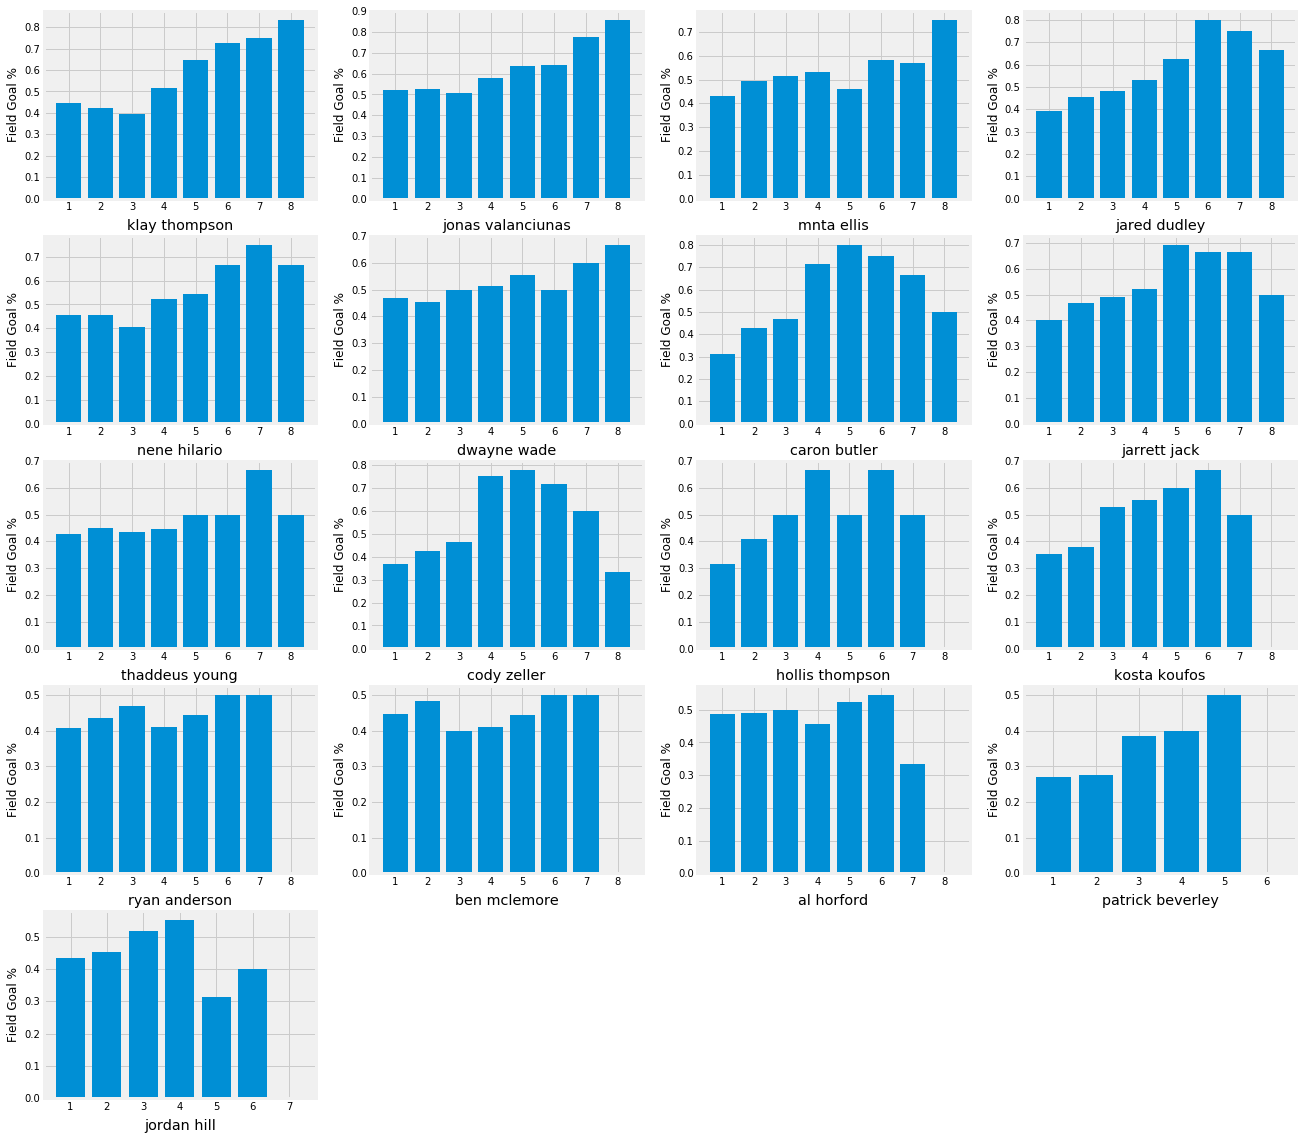

In [14]:
from operator import add
make_list = []
p = 9
fig = plt.figure(figsize=(20,20))
for n, each_player in tqdm(enumerate(new_list[:20])):
    make_percentage = []
    total_attempts = []
    a = hot_hand.loc[each_player]
    for j in range(1,p):# number of consecutive shots 
        total = 0
        made = 0
        for i in range(1,26-j+1):# shots taken (for a player in a game)
            total += (a[list(map(add, [i-1]*(j+1), range(1,(j+1))))]=='made').all(axis=1).sum()
            made +=  (a[list(map(add, [i-1]*(j+1), range(1,(j+2))))]=='made').all(axis=1).sum()
        #print('---n = ',j)
        #print('make percentage: ',made/float(total))
        make_percentage.append(made/float(total))
        total_attempts.append(total)
        #print('n shots were consecutively attempted before missing: ',total)
    #fig, ax = plt.subplots()
    plt.subplot(5,4,n+1)
    plt.bar(np.arange(p-1)+1, make_percentage)
    #ax.set_xticks(np.arange(p-1)+1)
    #ax.set_xticklabels(total_attempts, minor=False)
    plt.ylabel("Field Goal %")
    plt.title(each_player[1], y = - 0.2)

## CLUTCH GENE EXPRESSION AND INVERSE CLUTCH GENE


In [15]:
shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,Defender_Name,Player_Height,Defender_Height,Height_Diff,Player_Weight,Defender_Weight,Player_Age,Defender_Age,Player_Pos,Defender_Pos
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,alan anderson,182.5,195.0,-12.5,77.85,99.0,30,33,PG,SG
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,bojan bogdanovic,182.5,200.0,-17.5,77.85,97.2,30,26,PG,SF
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,bojan bogdanovic,182.5,200.0,-17.5,77.85,97.2,30,26,PG,SF
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,markel brown,182.5,187.5,-5.0,77.85,85.5,30,23,PG,SG
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,thaddeus young,182.5,0.0,182.5,77.85,0.0,30,0,PG,0


In [16]:
shots["SHOT_CLOCK"] = shots.SHOT_CLOCK.apply(lambda x: 0 if math.isnan(x) else x)
shots["PERIOD"] = shots.PERIOD.apply(lambda x: int(x))
shots["GAME_CLOCK_SECS"] = shots.GAME_CLOCK.apply(lambda x: int(x.strip().split(":")[0])*60 \
                                                  + int(x.strip().split(":")[1]))
#shots["TIME_LEFT"] = 2880 - ((shots.PERIOD-1)*12*60 + (shots.GAME_CLOCK_SECS))

In [18]:
clutch_shots = shots[shots["PERIOD"] == 4]
clutch_shots = clutch_shots[clutch_shots["GAME_CLOCK_SECS"] < 2*60]
clutch_shots = clutch_shots[clutch_shots["FINAL_MARGIN"] < 8]
len(clutch_shots)

4113

In [19]:
clutch_players = clutch_shots.set_index(['player_name','SHOT_RESULT','SHOT_NUMBER'])

In [20]:
clutch_players.head()

GAME_ID                     MATCHUP  \
player_name   SHOT_RESULT SHOT_NUMBER                                         
brian roberts missed      5            21400783  FEB 10, 2015 - CHA vs. DET   
                          6            21400783  FEB 10, 2015 - CHA vs. DET   
                          14           21400768  FEB 08, 2015 - CHA vs. IND   
                          11           21400761    FEB 07, 2015 - CHA @ PHI   
                          12           21400761    FEB 07, 2015 - CHA @ PHI   

                                      LOCATION  W  FINAL_MARGIN  PERIOD  \
player_name   SHOT_RESULT SHOT_NUMBER                                     
brian roberts missed      5                  H  L           -28       4   
                          6                  H  L           -28       4   
                          14                 H  L            -1       4   
                          11                 A  L            -8       4   
                          12                 A  L            -8       4   

                                      GAME_CLOCK  SHOT_CLOCK  DRIBBLES  \
player_name   SHOT_RESULT SHOT_NUMBER                                    
brian roberts missed      5                 1:33        12.1         0   
                          6                 0:25         8.3         6   
                          14                0:01         0.0         5   
                          11                1:57        11.7         2   
                          12                0:56        20.2         3   

                                       TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
player_name   SHOT_RESULT SHOT_NUMBER                                    
brian roberts missed      5                   0.9       24.0         3   
                          6                   5.8        9.3         2   
                          14                  3.7       34.4         3   
                          11                  2.2       25.3         3   
                          12                  3.5       28.0         3   

                                         CLOSEST_DEFENDER  \
player_name   SHOT_RESULT SHOT_NUMBER                       
brian roberts missed      5            Dinwiddie, Spencer   
                          6                Jerebko, Jonas   
                          14                 Hill, George   
                          11                Noel, Nerlens   
                          12                 Frazier, Tim   

                                       CLOSEST_DEFENDER_PLAYER_ID  \
player_name   SHOT_RESULT SHOT_NUMBER                               
brian roberts missed      5                                203915   
                          6                                201973   
                          14                               201588   
                          11                               203457   
                          12                               204025   

                                       CLOSE_DEF_DIST  FGM  PTS  player_id  \
player_name   SHOT_RESULT SHOT_NUMBER                                        
brian roberts missed      5                       6.7    0    0     203148   
                          6                       3.6    0    0     203148   
                          14                      3.6    0    0     203148   
                          11                      5.6    0    0     203148   
                          12                      5.3    0    0     203148   

                                           Defender_Name  Player_Height  \
player_name   SHOT_RESULT SHOT_NUMBER                                     
brian roberts missed      5            spencer dinwiddie          182.5   
                          6                jonas jerebko          182.5   
                          14                 george hill          182.5   
                          11                nerlens noel          182.5   
             

In [21]:
clutch_shooter_list = clutch_shots.player_name.unique()
len(clutch_shooter_list)

275

In [22]:
clutch_players = clutch_shots.groupby('player_name')

In [23]:
clutch_efficiency = []
for each_player in tqdm(clutch_shooter_list):
    stats = clutch_players.get_group(each_player)
    fgm = 0
    fga = 0
    pts = 0
    for each_shot in stats.iterrows():
        if each_shot[1]["SHOT_RESULT"] == 'made':
            fgm += 1
            pts += int(each_shot[1]["PTS"])
            fga += 1
        else:
            fga += 1
    if fga > 10:
        clutch_efficiency.append([each_player, int(fgm), int(pts), int(fga), float(fgm/float(fga))])

100%|██████████| 275/275 [00:00<00:00, 427.51it/s]


Text(66.275, 0.5, 'Points scored')

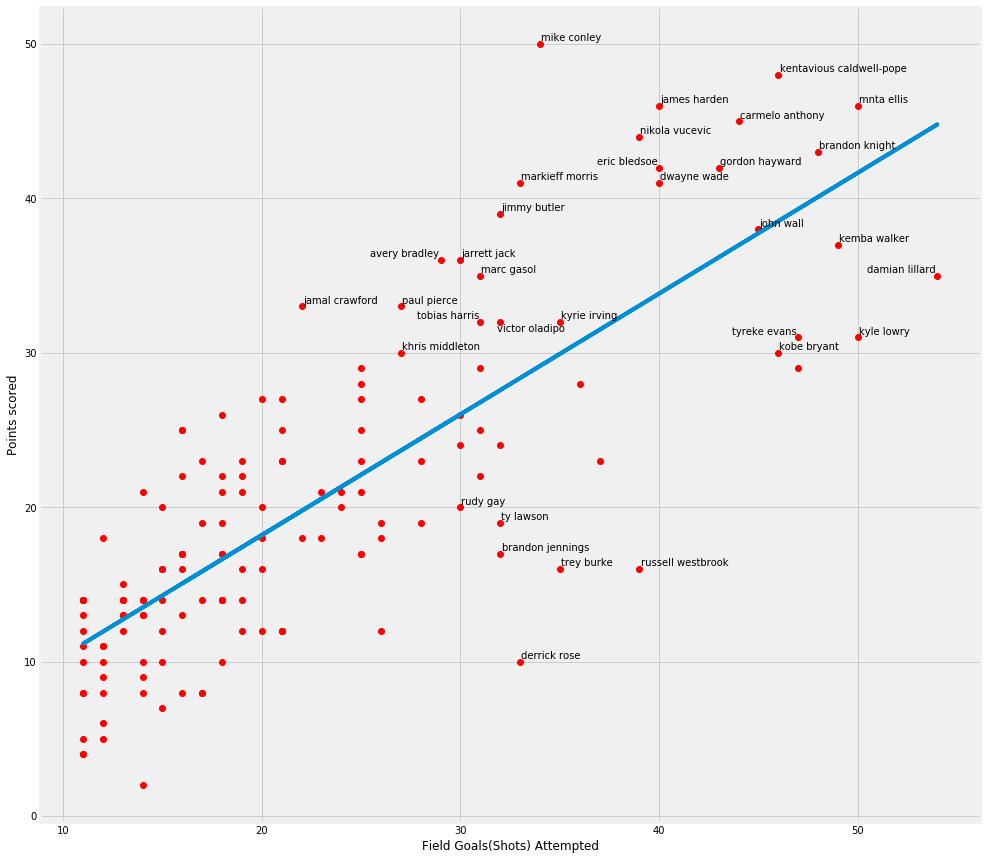

In [34]:
from adjustText import adjust_text
fig = plt.figure(figsize=(15,15))
#sorted_clutchness = sorted(clutch_efficiency, key=lambda x: x[4], reverse=True)
fga_p = []
fgm_p = []
pts_p = []
texts = []
for each_player in clutch_efficiency:
    fga_p.append(each_player[3])
    fgm_p.append(each_player[1])
    pts_p.append(each_player[2])
    plt.plot(each_player[3], each_player[2], 'ro')
    #print(each_player[0])
    if((each_player[2] >= 30 or (each_player[2] <= 20 and each_player[3] >= 30))):
    #    each_player[0] == "kobe bryant" or each_player == "stephen curry")):
        #plt.annotate(each_player[0], xy= (each_player[3]+0.5, each_player[1]+0.5))
        texts.append(plt.text(each_player[3], each_player[2], each_player[0]))
adjust_text(texts) 
#print(fga_p)
#print(pts_p)
fit = np.polyfit(fga_p, pts_p,1)
fit_fn = np.poly1d(fit) 
plt.plot(fga_p, fit_fn(fga_p))
plt.xlabel("Field Goals(Shots) Attempted")
plt.ylabel("Points scored")
#plt.set(xlim=(0,maximum2), ylim=(0, maximum3))
# for i, txt in enumerate(sorted_clutchness):
#     plt.annotate(b[i,0], (b[i,2], b[i,3]))

R^2 on training... 0.010559211550277945
R^2 on test... 0.010315556729879716


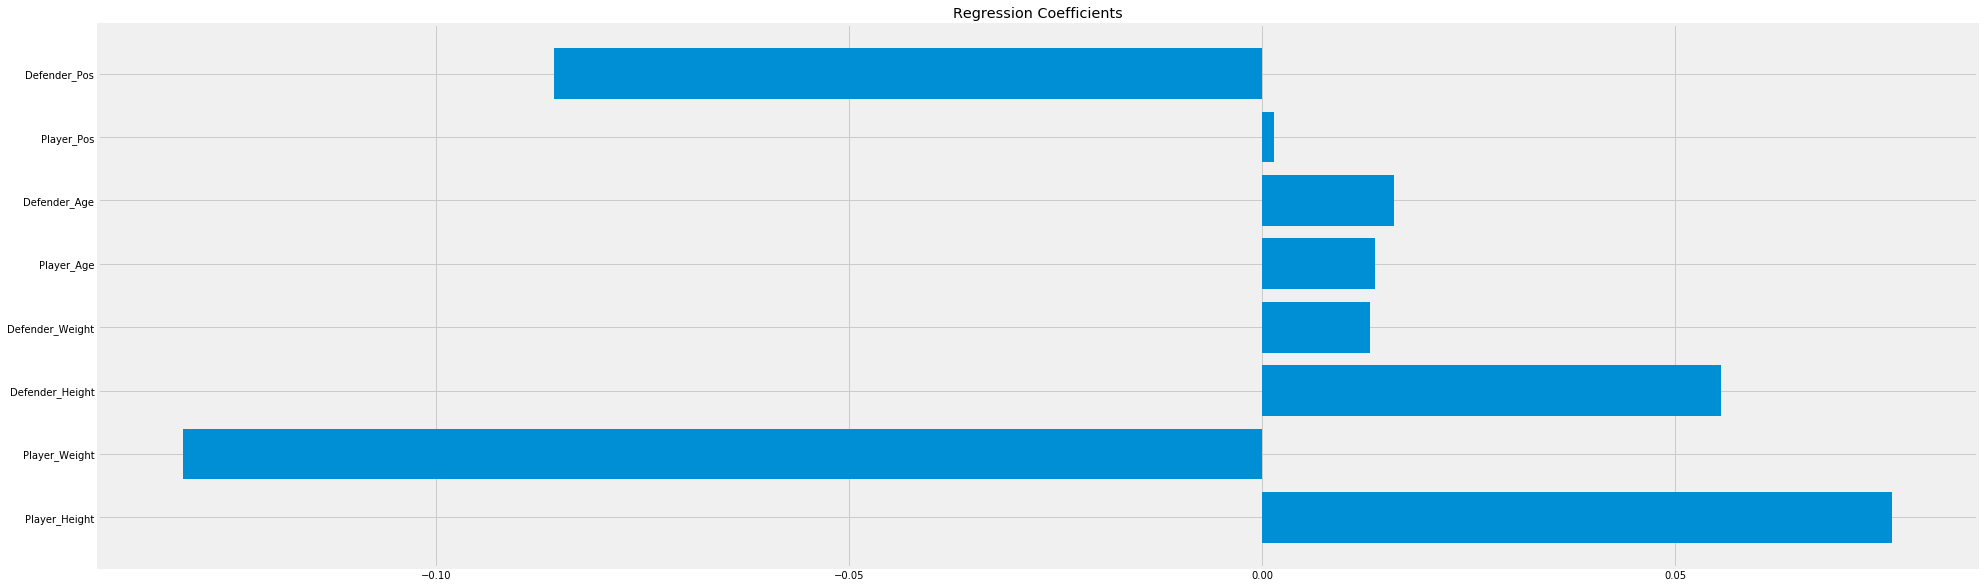

In [7]:
new_shots = shots[shots['Player_Weight']>0]
new_shots = new_shots[new_shots['Defender_Weight']>0]

new_shots = new_shots[new_shots['Player_Age'] >0]
new_shots = new_shots[new_shots['Defender_Age'] > 0]

def map_position(x):
    if x == 'PG':
        return 1
    if x == 'SG':
        return 2
    if x =='SF':
        return 3
    if x =='PF':
        return 4
    if x == 'C':
        return 5
    if x == 0:
        return 0

new_shots['Player_Pos'] = new_shots.Player_Pos.apply(lambda x: map_position(x))
new_shots['Defender_Pos']  = new_shots.Defender_Pos.apply(lambda x: map_position(x))
X = new_shots[['Player_Height','Player_Weight','Defender_Height','Defender_Weight','Player_Age','Defender_Age','Player_Pos','Defender_Pos']]#,'SHOT_DIST']]

X_std = StandardScaler().fit_transform(X)
y = new_shots.CLOSE_DEF_DIST*0.3048

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

model.predict(X_test)
fig = plt.figure(figsize=(30,10))
plt.barh(range(len(X.columns)), model.coef_)
plt.yticks(range(len(X.columns)),['Player_Height','Player_Weight','Defender_Height','Defender_Weight','Player_Age','Defender_Age','Player_Pos','Defender_Pos','SHOT_DIST'], fontsize = 10)
plt.title('Regression Coefficients')

print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))